<a href="https://colab.research.google.com/github/KyllianBeguin/Meteo_CTF/blob/main/Stat_Dataviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df_raw = pd.read_excel("Climat.xlsx")

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


#Pivotage du tableau

In [ ]:
df = df_raw.iloc[:, 3:] # Begin at the third column
colonnes = list(df.iloc[1,:]) # Extract month name
df = df.iloc[1:, :] # skip the month row and the line under
df.columns = colonnes # Change columns name
df = df.iloc[2:, :] # Skip the first two rows
df.reset_index(drop = True, inplace=True) # Reset index
df = df.iloc[:31, :] # Skip the garbage rows
df = df.melt() # Unpivot the table
df.dropna(inplace = True)
df.reset_index(drop = True, inplace=True)
df.columns = ["month", "temperature_C"]


day = []
for i in colonnes:
  nb_day = len(df[df["month"] == i])
  month_days = ["D"+str(i+1) for i in range(len(df[df["month"] == i]))]
  day = day + month_days

df["day"] = day

df.head(5)
df.tail(5)

,month,temperature_C,day
360,décembre,-7,D27
361,décembre,-8,D28
362,décembre,-6,D29
363,décembre,-7,D30
364,décembre,-5,D31


#Statistiques

##Moyenne des températures de chaque mois sur une année

In [ ]:
df.groupby(['month']).mean()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


,temperature_C
month,
août,17.838710
avril,8.000000
décembre,-7.000000
février,-4.928571
janvier,-8.967742
juillet,18.322581
juin,17.033333
mai,12.903226
mars,1.193548


##Minimum et maximum par mois et par année

In [ ]:
max = df.groupby(["month"]).max()
min = df.groupby(["month"]).min()
minyear = min.min()
maxyear = max.max()
min.to_csv('mois_min.csv', index=False)
max.to_csv('mois_max.csv', index=False)
minyear.to_csv('annee_min.csv', index=False)
maxyear.to_csv('annee_max.csv', index=False)

           temperature_C day
month                       
août                  26  D9
avril                 16  D9
décembre              -3  D9
février                5  D9
janvier               -3  D9
juillet               26  D9
juin                  22  D9
mai                   18  D9
mars                   7  D9
novembre               5  D9
octobre                7  D9
septembre             16  D9
           temperature_C day
month                       
août                  14  D1
avril                  2  D1
décembre             -11  D1
février              -12  D1
janvier              -23  D1
juillet               13  D1
juin                  11  D1
mai                    5  D1
mars                  -8  D1
novembre              -8  D1
octobre                1  D1
septembre              6  D1
temperature_C    -23
day               D1
dtype: object
temperature_C    26
day              D9
dtype: object


#Ecart-type

In [ ]:
listectype = []
for colonne in colonnes:
  listtemp = list(df[df["month"]==colonne].loc[:,"temperature_C"])
  ectype = np.std(listtemp)
  listectype.append(ectype)

data_ = {"Ecart-type" : listectype, "Mois" : colonnes}
data = pd.DataFrame(data_,columns=["Ecart-type","Mois"])
data.head(12)
data.to_csv('ecart_type.csv', index=False)

janvier 4.417588533298653
février 4.479545348650044
mars 3.4493510828589167
avril 3.0983866769659336
mai 3.970494717771346
juin 2.9606680927715545
juillet 3.5139087396506374
août 2.653017444509947
septembre 2.29128784747792
octobre 1.7733135647593228
novembre 3.654525352977532
décembre 2.032002032003048


# Graphiques

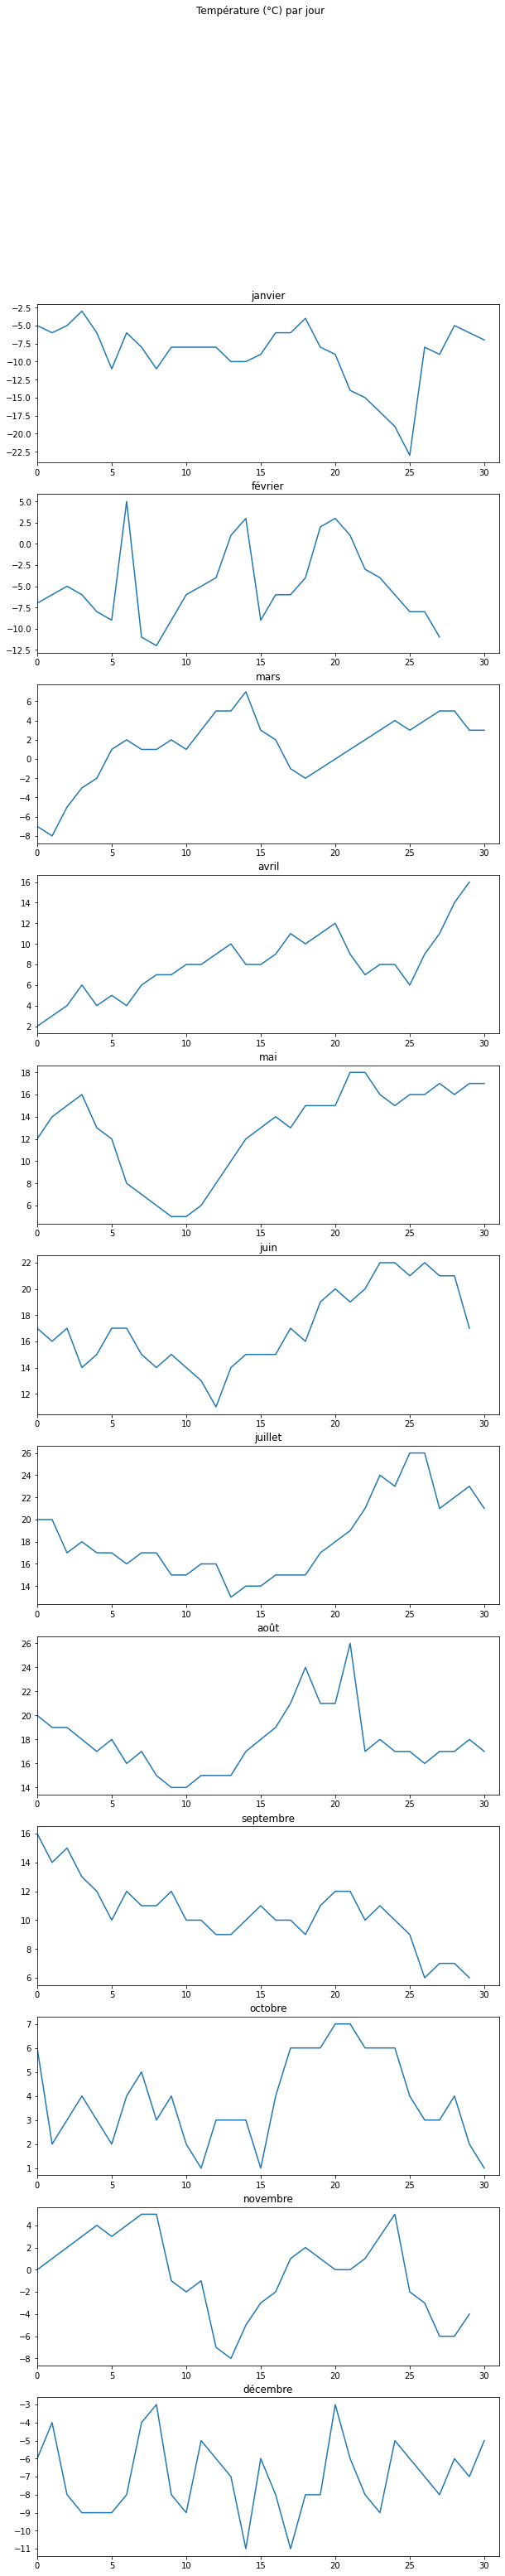

In [ ]:
# for colonne in colonnes:
#   mois = df[df["month"]==colonne]

fig, axs = plt.subplots(12,1, figsize=(10,50))
for i in range(12):
  mois = colonnes[i]
  dfm = df[df["month"]==mois]
  x= list(range(len(dfm)))
  y=dfm['temperature_C']
  axs[i].plot(x,y)
  axs[i].set_xlim(0,31)
  axs[i].set_title(mois)
fig.suptitle('Température (°C) par jour')
plt.show()
  
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/cohere.html#sphx-glr-gallery-lines-bars-and-markers-cohere-py

### Graphique tous les mois

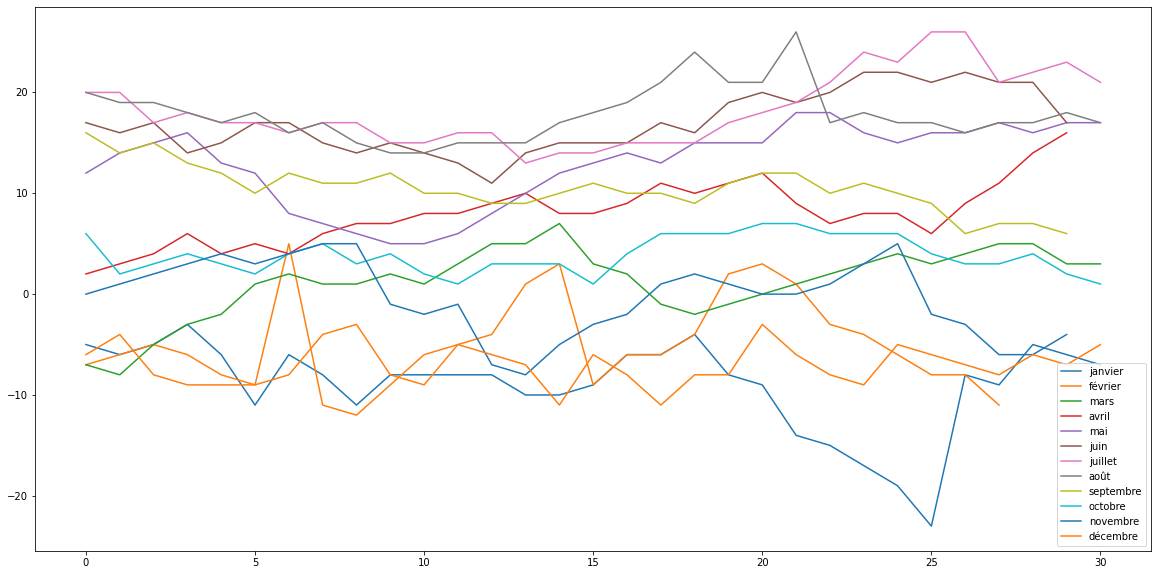

In [ ]:
plt.subplots(figsize=(20,10))
for i in range(12):
  mois = colonnes[i]
  dfm = df[df["month"]==mois]
  x= list(range(len(dfm)))
  y=dfm['temperature_C']
  plt.plot(x,y, label = mois)
plt.legend()
plt.show()